# Regularization -Housing price prediction using Ridge and Lasso Regression




Business Goal 

A US-based housing company named Surprise Housing has decided to enter the Australian market. Model the price of houses with the available independent variables. This model to be used by the management to understand how exactly the prices vary with the variables. The below are objectives of the Regularization -Housing price prediction using Ridge and Lasso Regression model.

1.Which variables are significant in predicting the price of a house, and

2.How well those variables describe the price of a house.

3.determine the optimal value of lambda for ridge and lasso regression.

### 1. Data Understanding and Exploration¶
Let's first have a look at the dataset and understand the size, attribute names etc.

In [664]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [665]:
# reading the dataset
house = pd.read_csv("train.csv")

In [666]:
# summary of the dataset: 1460  rows, 81 columns, no null values
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [667]:
# head
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Column with the highest percentage of missing values: PoolQC
Percentage of missing values in that column: 99.52054794520548


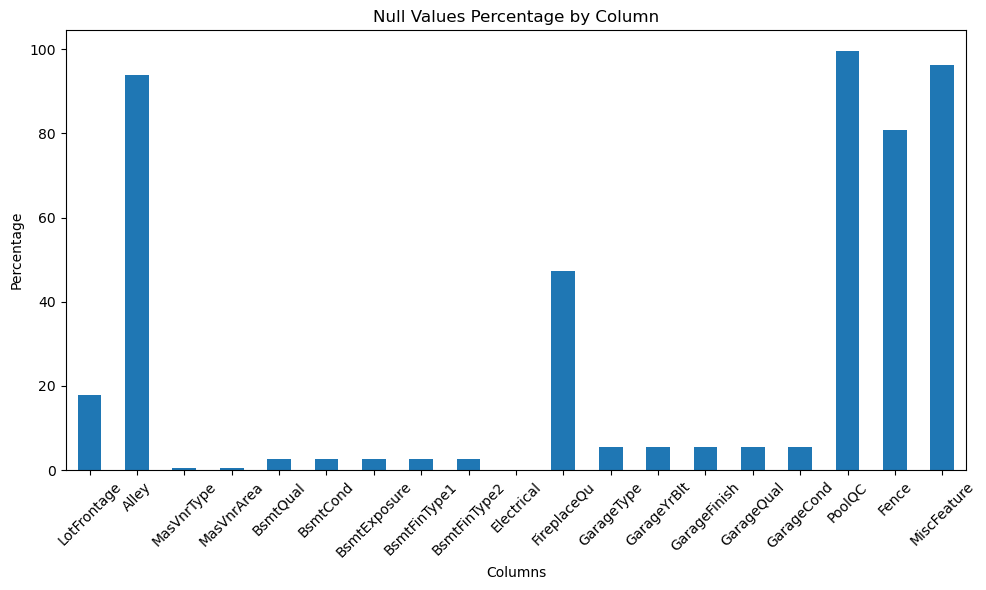

In [668]:
#missing values % coulmn wise
# Calculate percentage of null values in each column
null_percentage = (house.isnull().sum() / len(house)) * 100

# Find the column with the highest percentage of missing values
column_with_highest_missing = null_percentage.idxmax()

print("Column with the highest percentage of missing values:", column_with_highest_missing)
print("Percentage of missing values in that column:", null_percentage[column_with_highest_missing])


# Filter out columns with zero null values
columns_with_nulls = null_percentage[null_percentage > 0]

# Create a bar plot for the null value percentages
plt.figure(figsize=(10, 6))
columns_with_nulls.plot(kind='bar')
plt.title('Null Values Percentage by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [669]:

house['SaleCondition'].astype('category').value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [670]:

house['SaleType'].astype('category').value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [671]:

house['BldgType'].astype('category').value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [672]:

house['HouseStyle'].astype('category').value_counts()     

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

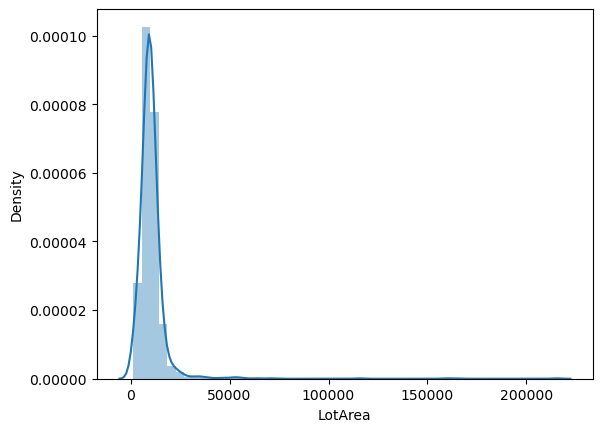

In [673]:
sns.distplot(house['LotArea'])
plt.show()

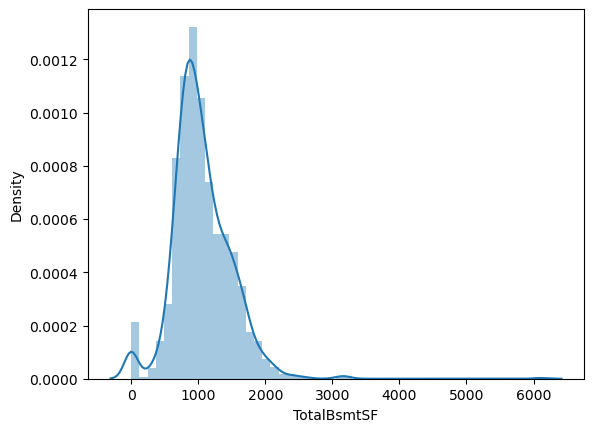

In [674]:
sns.distplot(house['TotalBsmtSF'])
plt.show()

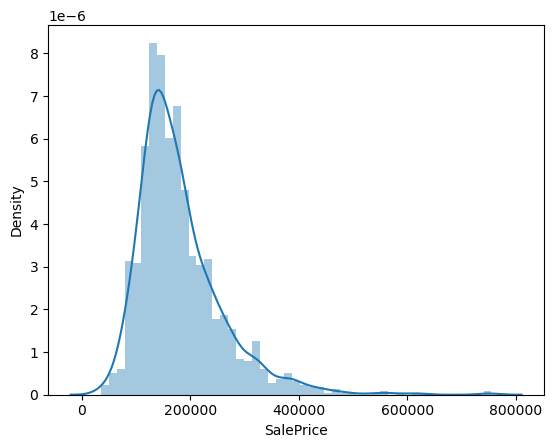

In [675]:
sns.distplot(house['SalePrice'])
plt.show()

In [676]:
# all numeric (float and int) variables in the dataset
housenumericcols = house.select_dtypes(include=['float64', 'int64'])
housenumericcols.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [677]:
# number of years of the house
house['house_years'] = house['YrSold'] - house['YearBuilt']

In [678]:
# Remove column YearBuilt
house.drop('YearBuilt', axis=1, inplace=True)

In [679]:
# Remove column YearRemodAdd
house.drop('YearRemodAdd', axis=1, inplace=True)

In [680]:
# Remove column GarageYrBlt
house.drop('GarageYrBlt', axis=1, inplace=True)

In [681]:
# Remove column YrSold
house.drop('YrSold', axis=1, inplace=True)

In [682]:
# Remove column MoSold
house.drop('MoSold', axis=1, inplace=True)

In [683]:
columns_with_nulls =house.columns[house.isnull().any()]

null_counts = house[columns_with_nulls].isnull().sum()

print("Columns with null values:", columns_with_nulls)
print("Number of rows with null values:")
print(null_counts)

Columns with null values: Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')
Number of rows with null values:
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [684]:
for col in columns_with_nulls:    
    house[col]=house[col].fillna('None')

In [685]:
# Select columns with numerical data types (integers and floats)
numeric_columns = house.select_dtypes(include=[np.number]).columns

# Loop through numeric columns and remove rows with null values
for column in numeric_columns:
    house = house[house[column].notnull()]

print("DataFrame after removing rows with null values in numerical columns:")
print(house)

DataFrame after removing rows with null values in numerical columns:
        Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL        65.0     8450   Pave  None      Reg   
1        2          20       RL        80.0     9600   Pave  None      Reg   
2        3          60       RL        68.0    11250   Pave  None      IR1   
3        4          70       RL        60.0     9550   Pave  None      IR1   
4        5          60       RL        84.0    14260   Pave  None      IR1   
...    ...         ...      ...         ...      ...    ...   ...      ...   
1455  1456          60       RL        62.0     7917   Pave  None      Reg   
1456  1457          20       RL        85.0    13175   Pave  None      Reg   
1457  1458          70       RL        66.0     9042   Pave  None      Reg   
1458  1459          20       RL        68.0     9717   Pave  None      Reg   
1459  1460          20       RL        75.0     9937   Pave  None      Re

In [686]:
# Drop column id
house.drop('Id', axis=1, inplace=True)
house.drop('LotFrontage', axis=1, inplace=True)
house.drop('MasVnrArea', axis=1, inplace=True)


In [687]:
def maxsamefeaturevalue(data, prcnt):
    df1= data.copy()
    my_list= []
    cat_obj_cols = df1.select_dtypes(include=['object'])
    for col in (cat_obj_cols):
        if(df1[col].value_counts().max() > int(prcnt*len(df1.index)/100)):
            my_list.append(col)
    return my_list

##Removing the skewed data
columns_to_drop = maxsamefeaturevalue(data=house, prcnt=80)  
print("Categorical columns to drop:",columns_to_drop)
print("\nNumber of categorical object type columns removed: ", len(columns_to_drop),"\n")

##Dropping columns with skewed data (object type categorical variables)
house = house.drop(columns_to_drop, axis=1)
house.head()

Categorical columns to drop: ['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Number of categorical object type columns removed:  24 



,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,house_years
0,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,Gable,...,548,0,61,0,0,0,0,0,208500,5
1,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,Gable,...,460,298,0,0,0,0,0,0,181500,31
2,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,Gable,...,608,0,42,0,0,0,0,0,223500,7
3,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,Gable,...,642,0,35,272,0,0,0,0,140000,91
4,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,Gable,...,836,192,84,0,0,0,0,0,250000,8


In [688]:
# remove numeric columns that have more than 75% of their data with a one value
# Identify numeric columns
numeric_columns = house.select_dtypes(include=['number']).columns

# Calculate the percentage of the most common value in each numeric column
dominant_percentages = house[numeric_columns].apply(lambda col: col.value_counts(normalize=True).max() * 100)

# Set the threshold for dominant value percentage
threshold = 75

# Filter out columns with a dominant value exceeding the threshold
filtered_columns = dominant_percentages[dominant_percentages <= threshold].index

# Create a new DataFrame with filtered columns
df_filtered = house[filtered_columns]

# Print the columns that were removed
removed_columns = set(numeric_columns) - set(filtered_columns)
print("Removed Columns:", removed_columns)

# Now you can work with the df_filtered DataFrame which 



def getmostNum_Counts():
    column = []
    numerical_columns = house.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(house[col].value_counts().max() >= 1241):
            column.append(col)
    return column

colstoremove = getmostNum_Counts()
house.drop(colstoremove, axis = 1, inplace = True)



Removed Columns: {'KitchenAbvGr', '3SsnPorch', 'BsmtFinSF2', 'ScreenPorch', 'MiscVal', 'PoolArea', 'LowQualFinSF', 'BsmtHalfBath', 'EnclosedPorch'}


<Figure size 1000x500 with 0 Axes>

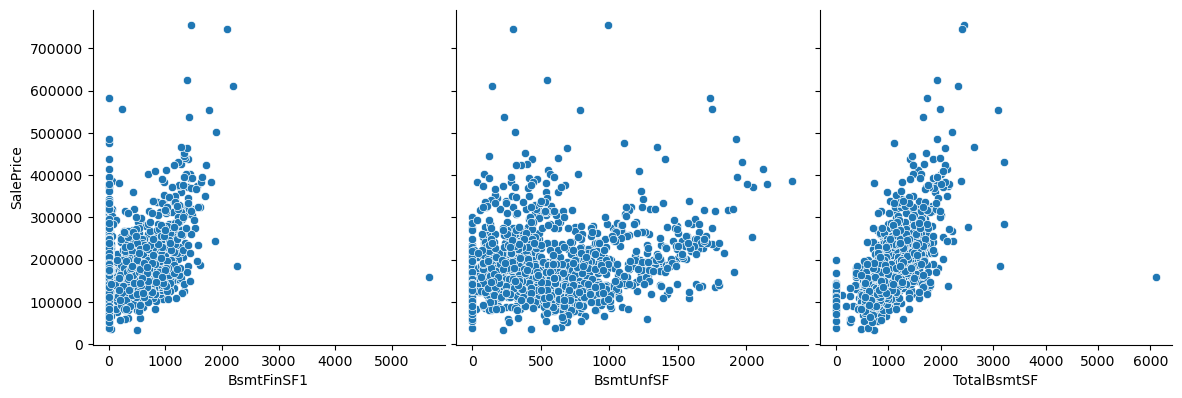

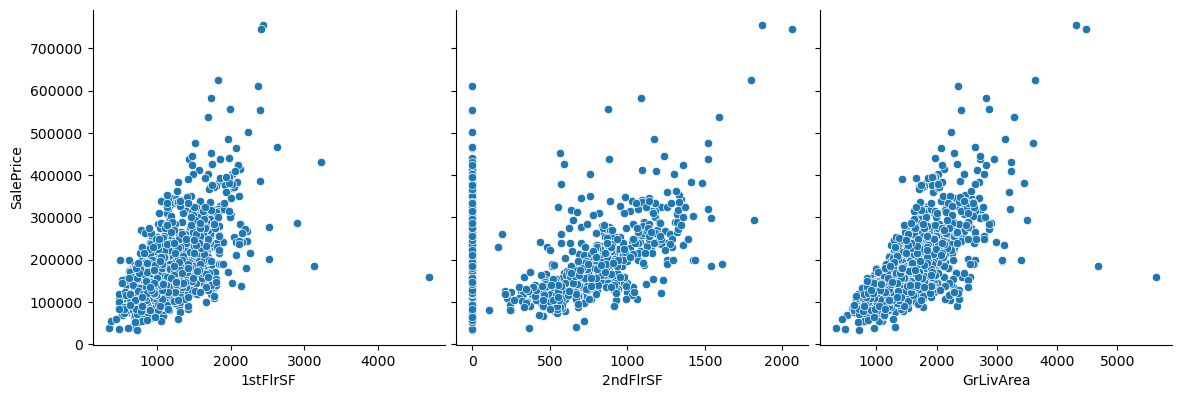

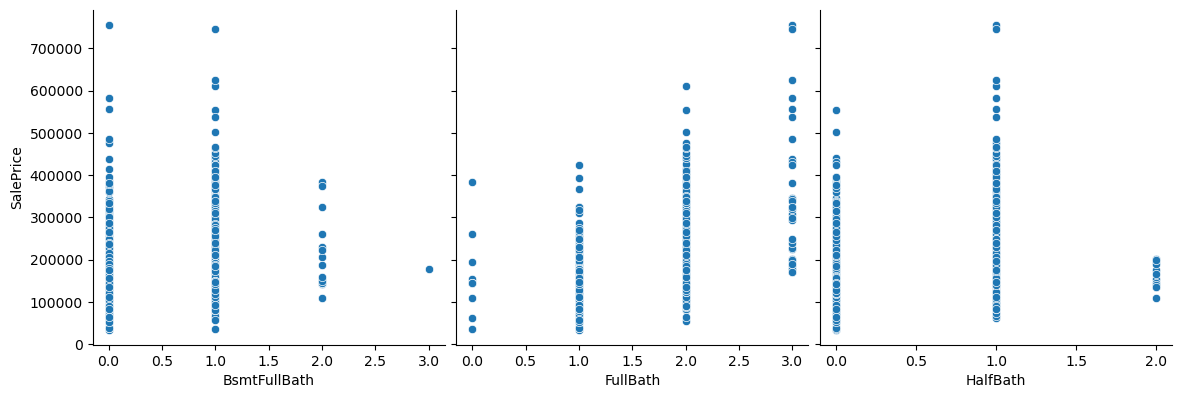

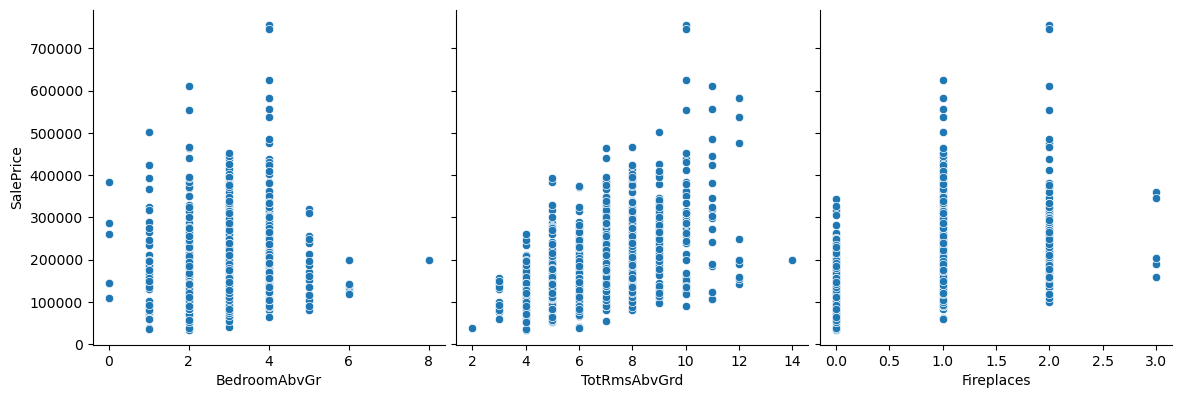

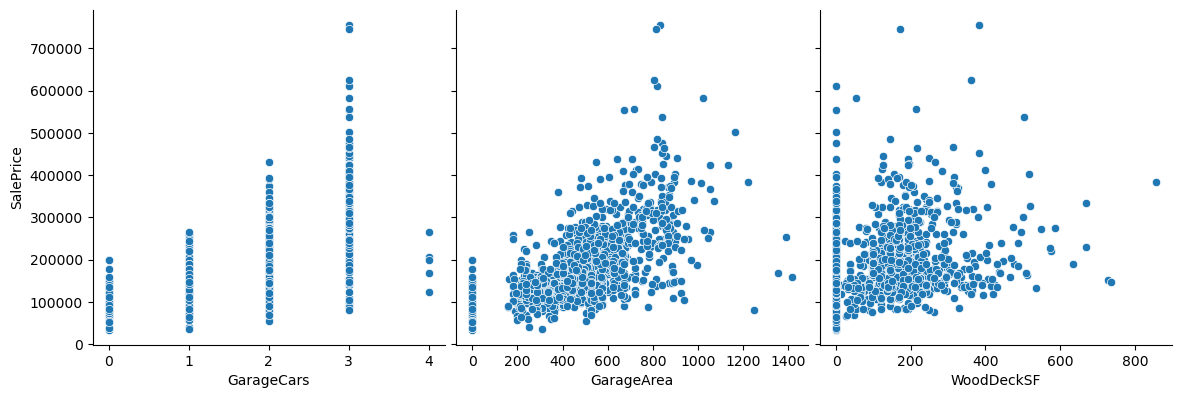

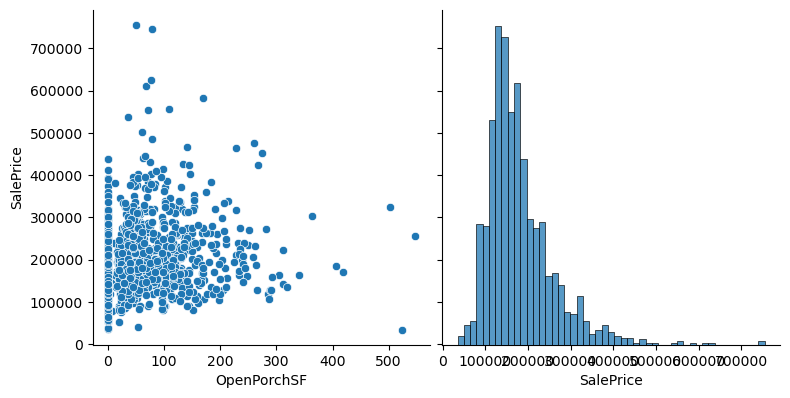

In [689]:
plt.figure(figsize=(10,5))

sns.pairplot(house, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['OpenPorchSF','SalePrice'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')

plt.show()

In [690]:
# check for redundant values
house[house.duplicated(keep=False)]

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,...,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,house_years


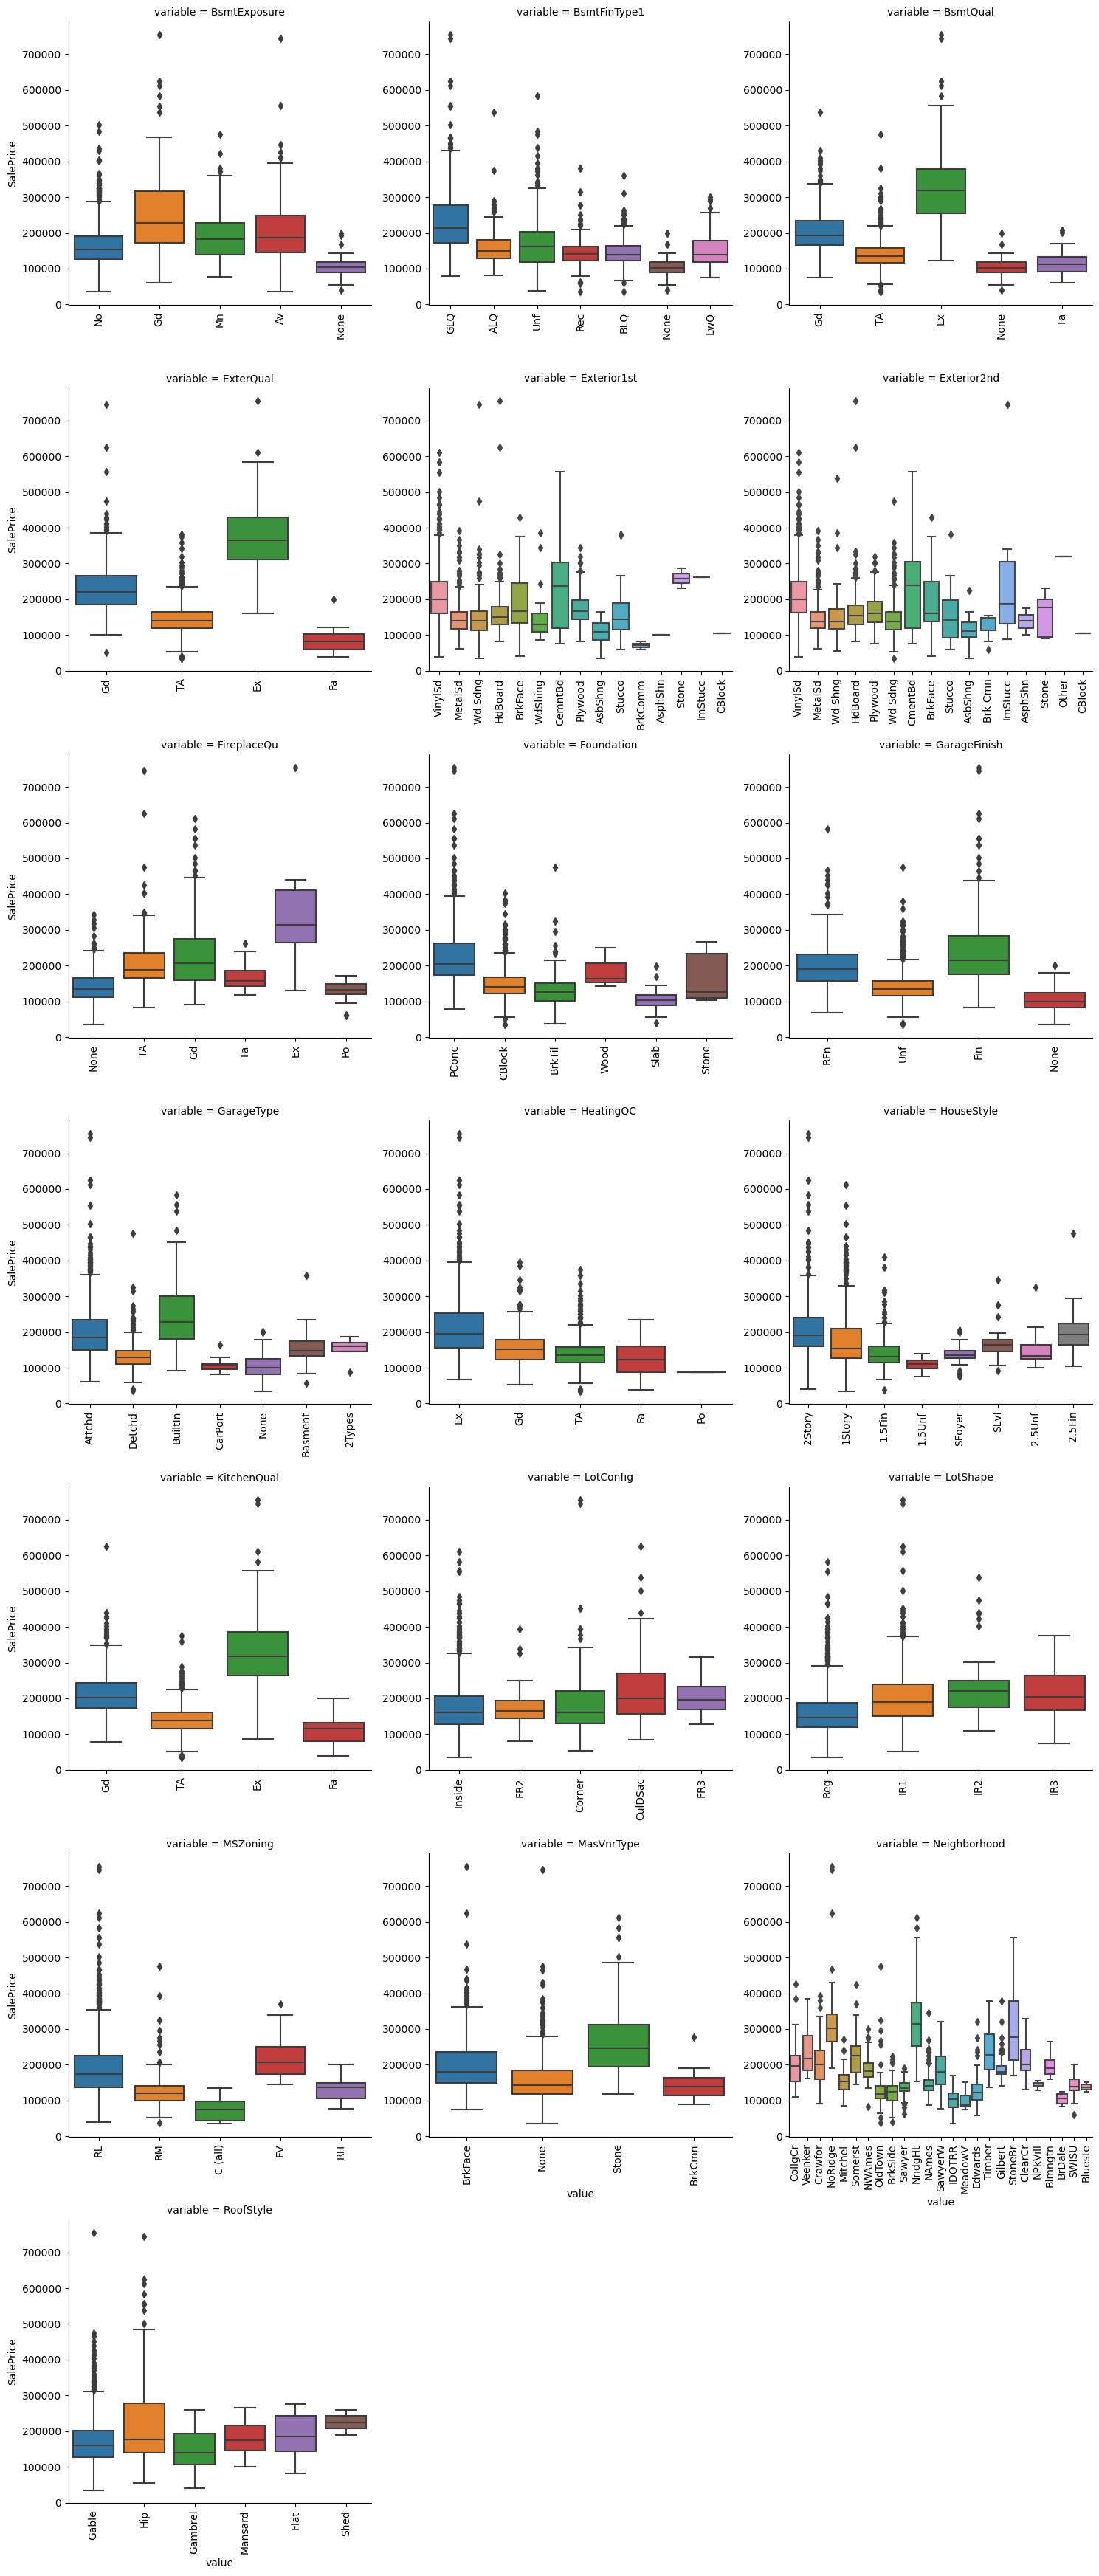

In [691]:
# Plotting Categorical Features with Sale Price
def boxplt(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
categoricalcols = house.select_dtypes(exclude=['int64','float64'])
f = pd.melt(house, id_vars=['SalePrice'], value_vars=sorted(house[categoricalcols.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(boxplt, "value", "SalePrice")


#### More price demand for alleys properties 
#### if the basement quality is good, it is sold for high prices
#### House with Good garage has more demanding price
#### House with Good Kitchens has more demanding price

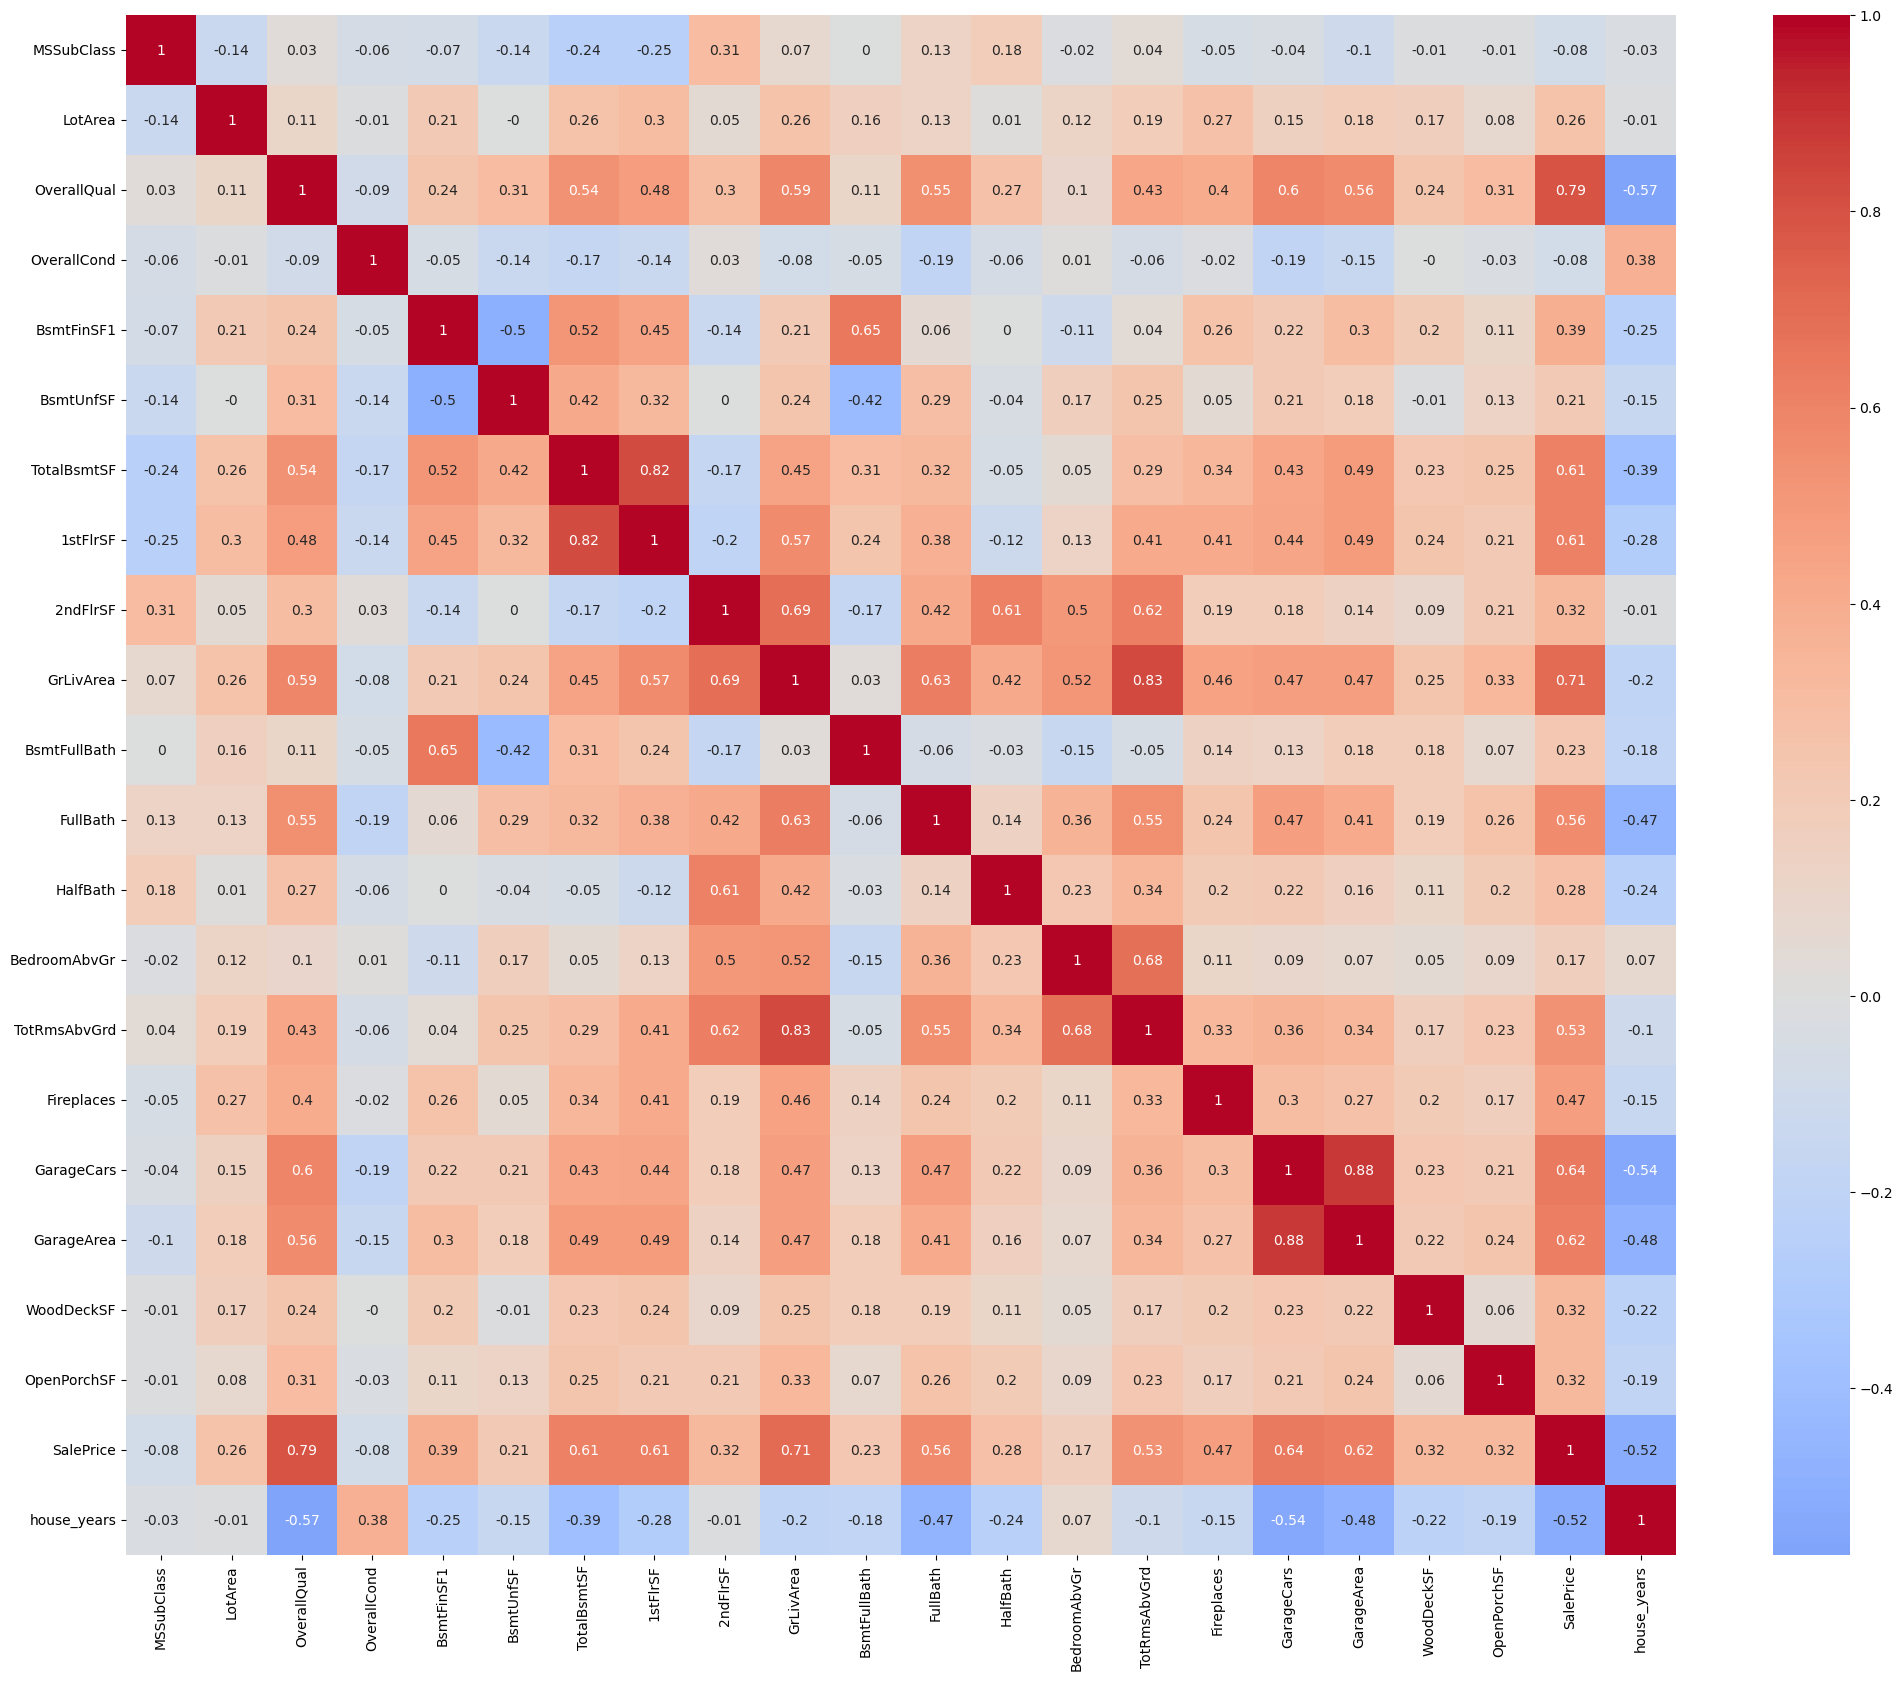

In [692]:
house_num = house.select_dtypes(include=['int64','float64'])

# Checking the corelation
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(house_num.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

### identify the outliers and remove them

In [693]:
#get the categorical column values

categoricalcols = house.select_dtypes(exclude=['int64','float64'])
for col in list(categoricalcols):
    print(house[col].value_counts())


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
VinylSd    515
HdBoard    222
M

In [694]:
print(categoricalcols)

     MSZoning LotShape LotConfig Neighborhood HouseStyle RoofStyle  \
0          RL      Reg    Inside      CollgCr     2Story     Gable   
1          RL      Reg       FR2      Veenker     1Story     Gable   
2          RL      IR1    Inside      CollgCr     2Story     Gable   
3          RL      IR1    Corner      Crawfor     2Story     Gable   
4          RL      IR1       FR2      NoRidge     2Story     Gable   
...       ...      ...       ...          ...        ...       ...   
1455       RL      Reg    Inside      Gilbert     2Story     Gable   
1456       RL      Reg    Inside       NWAmes     1Story     Gable   
1457       RL      Reg    Inside      Crawfor     2Story     Gable   
1458       RL      Reg    Inside        NAmes     1Story       Hip   
1459       RL      Reg    Inside      Edwards     1Story     Gable   

     Exterior1st Exterior2nd MasVnrType ExterQual Foundation BsmtQual  \
0        VinylSd     VinylSd    BrkFace        Gd      PConc       Gd   
1        Meta

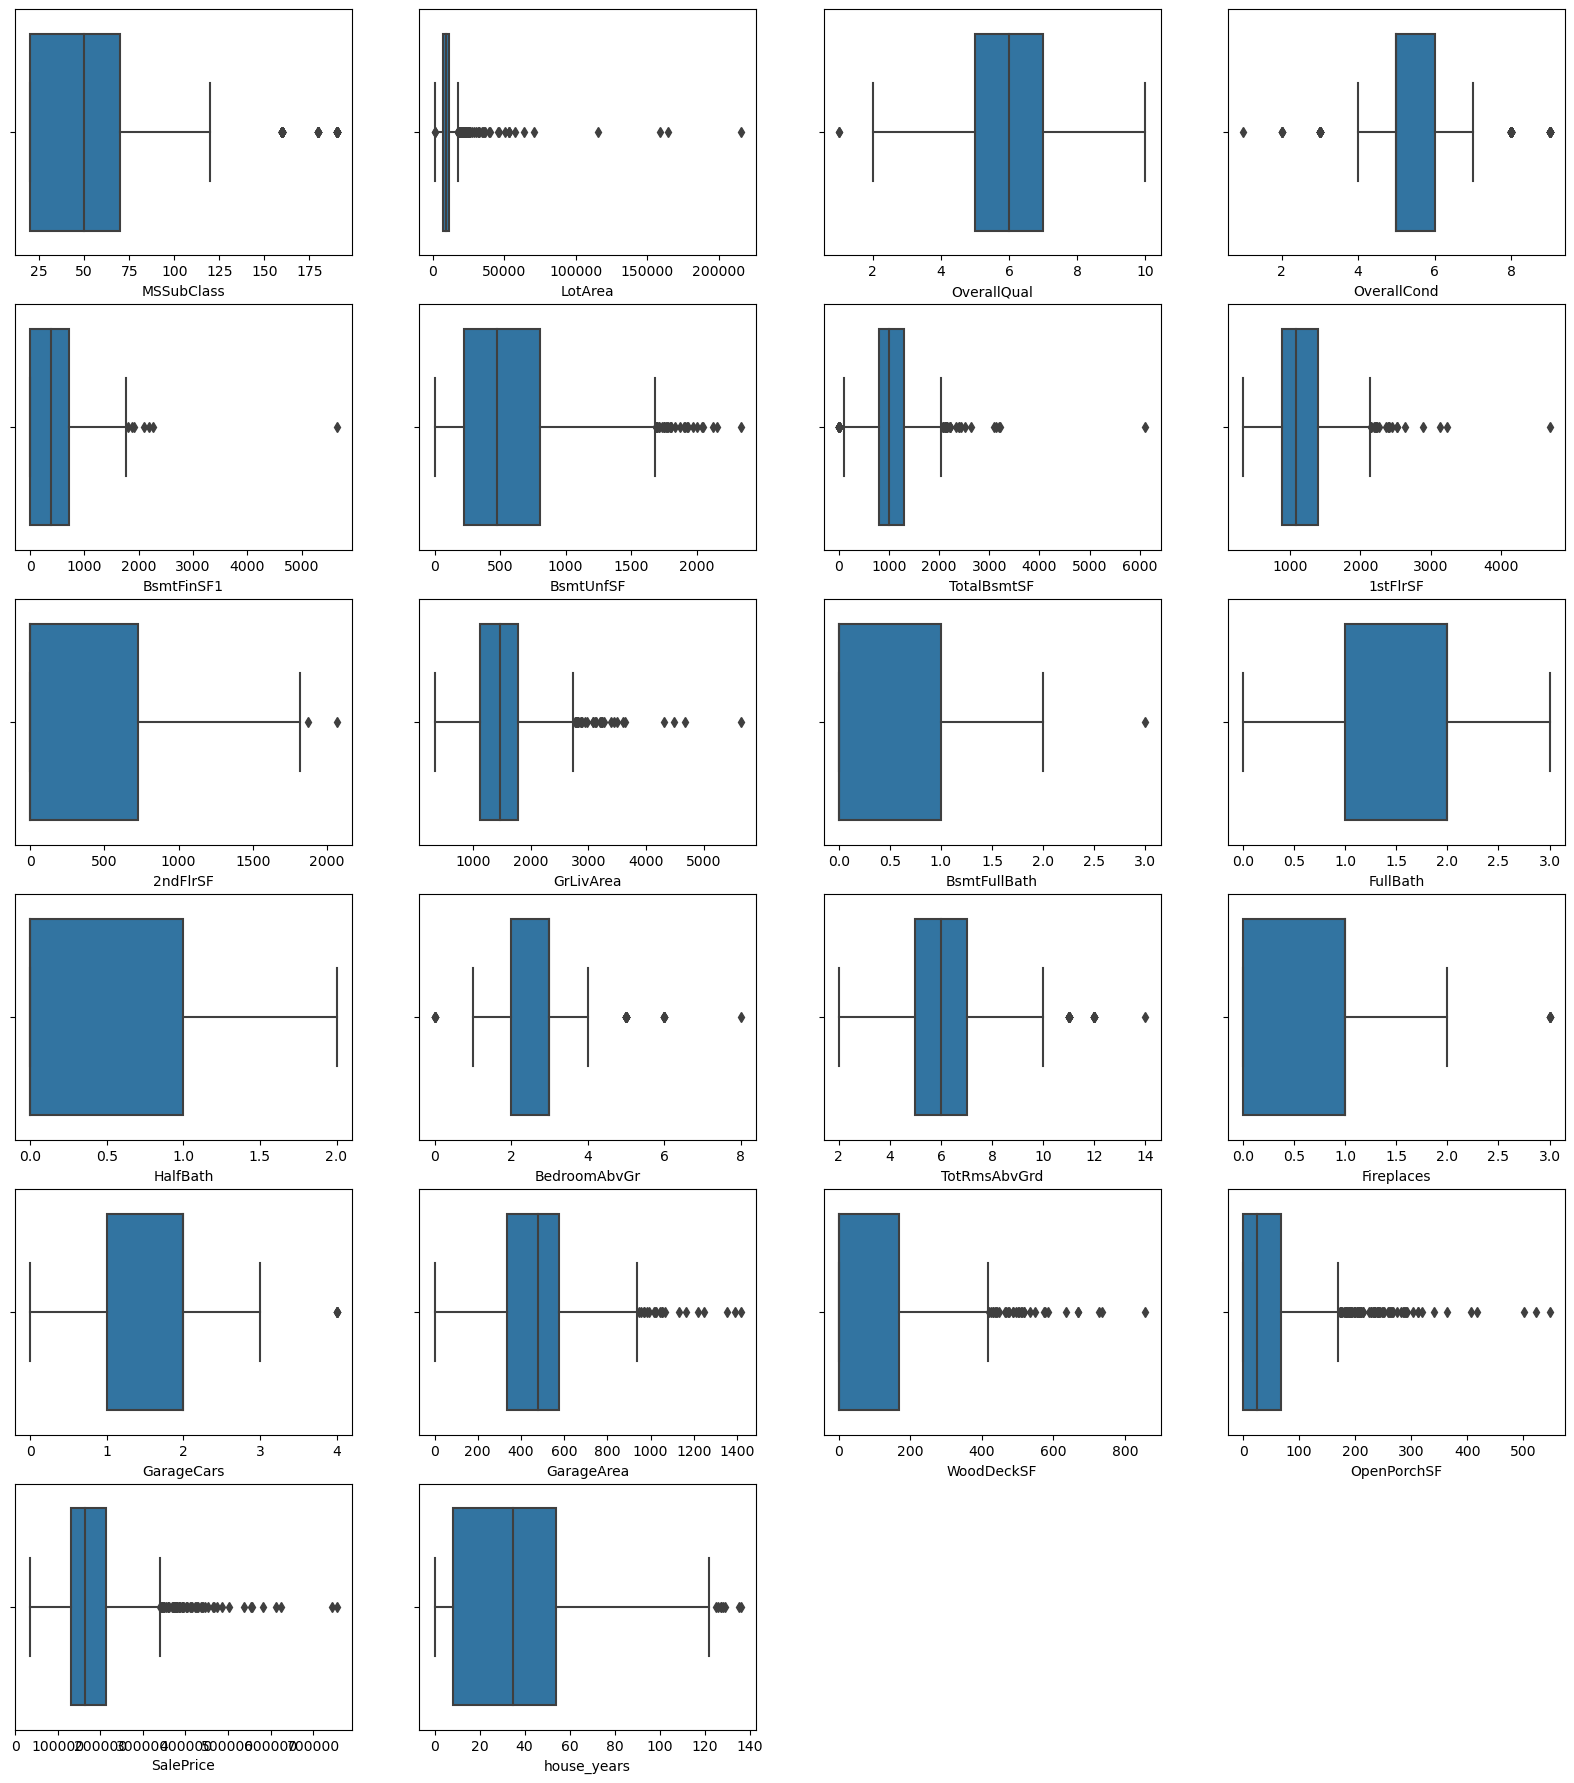

In [695]:
# Plotting the spread of the numeric columns
plt.figure(figsize=(20,30))
for i in enumerate(house_num):
    plt.subplot(8,4,i[0]+1)
    sns.boxplot(x=i[1], data=house)

In [696]:
## Removing the highly correlated variables
#### Removing following columns which shows high correlation
##### - TotRmsAbvGrd and GrLivArea show 82%
##### - Garage Area and Garage Cars show 88%

##### Hence dropping TotRmsAbvGrd and Garage Cars

house.drop(['TotRmsAbvGrd', 'GarageCars'], axis = 1, inplace = True)

In [697]:
house.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,...,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,house_years
0,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,Gable,...,Gd,0,None,Attchd,RFn,548,0,61,208500,5
1,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,Gable,...,TA,1,TA,Attchd,RFn,460,298,0,181500,31
2,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,Gable,...,Gd,1,TA,Attchd,RFn,608,0,42,223500,7
3,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,Gable,...,Gd,1,Gd,Detchd,Unf,642,0,35,140000,91
4,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,Gable,...,Gd,1,TA,Attchd,RFn,836,192,84,250000,8


In [698]:
# Removing outliers to make the model more robust

def removeoutliers(x):
    list = []
    outl_col = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea']
    for col in outl_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x  
df = removeoutliers(house)
df.shape

(1455, 39)

In [699]:
# Map categorical values to new values

house['d_LotShape'] = house['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
house['d_ExterQual'] = house['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
house['d_BsmtQual'] = house['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_BsmtExposure'] = house['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
house['d_BsmtFinType1'] = house['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
house['d_HeatingQC'] = house['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_KitchenQual'] = house['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_FireplaceQu'] = house['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_GarageFinish'] = house['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })

house['d_HouseStyle'] = house['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })

house['d_LotConfig'] = house['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
house['d_MasVnrType'] = house['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })


house = house.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', \
                                'KitchenQual', 'FireplaceQu', 'GarageFinish','HouseStyle','LotConfig','MasVnrType' ], axis=1)

In [700]:
house.head()

,MSSubClass,MSZoning,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,Foundation,...,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_HouseStyle,d_LotConfig,d_MasVnrType
0,60,RL,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,PConc,...,4,1,6,5,4,0,2,4,5,1
1,20,RL,9600,Veenker,6,8,Gable,MetalSd,MetalSd,CBlock,...,4,4,5,5,3,3,2,1,2,0
2,60,RL,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,PConc,...,4,2,6,5,4,3,2,4,5,1
3,70,RL,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,BrkTil,...,3,1,5,4,4,4,1,4,4,0
4,60,RL,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,PConc,...,4,3,6,5,4,3,2,4,2,1


In [701]:
#Creating dummies for nominal variables


##Creating dummies for 'MSSubClass'
d_MSSubClass = pd.get_dummies(house['MSSubClass'], prefix='MSSubClass', drop_first = True)
house = pd.concat([house, d_MSSubClass], axis = 1)

##Creating dummies for 'MSZoning'
d_MSZoning = pd.get_dummies(house['MSZoning'], prefix='MSZoning', drop_first = True)
house = pd.concat([house, d_MSZoning], axis = 1)

##Creating dummies for 'Neighborhood'
d_Neighborhood = pd.get_dummies(house['Neighborhood'], prefix='Neighborhood', drop_first = True)
house = pd.concat([house, d_Neighborhood], axis = 1)

##Creating dummies for 'Exterior2nd'
d_Exterior2nd = pd.get_dummies(house['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
house = pd.concat([house, d_Exterior2nd], axis = 1)


##Creating dummies for 'Foundation'
d_Foundation = pd.get_dummies(house['Foundation'], prefix='Foundation', drop_first = True)
house = pd.concat([house, d_Foundation], axis = 1)


##Creating dummies for 'RoofStyle'
d_RoofStyle = pd.get_dummies(house['RoofStyle'], prefix='RoofStyle', drop_first = True)
house = pd.concat([house, d_RoofStyle], axis = 1)

##Creating dummies for 'Exterior1st'
d_Exterior1st = pd.get_dummies(house['Exterior1st'], prefix='Exterior1st', drop_first = True)
house = pd.concat([house, d_Exterior1st], axis = 1)

##Creating dummies for 'GarageType'
d_GarageType = pd.get_dummies(house['GarageType'], prefix='GarageType', drop_first = True)
house = pd.concat([house, d_GarageType], axis = 1)

##Creating dummies for 'GarageType'
d_GarageType = pd.get_dummies(house['GarageType'], prefix='GarageType', drop_first = True)
house = pd.concat([house, d_GarageType], axis = 1)

##Dropping columns for which we have created dummies, as we now have new columns derived from these columns
orig_before_dum_cols = ['MSSubClass','MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', \
              'GarageType']
house = house.drop(orig_before_dum_cols, axis=1)

In [702]:
house.head()

,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,8450,7,5,706,150,856,856,854,1710,1,...,0,0,0,0,1,0,0,0,0,0
1,9600,6,8,978,284,1262,1262,0,1262,0,...,0,0,0,0,1,0,0,0,0,0
2,11250,7,5,486,434,920,920,866,1786,1,...,0,0,0,0,1,0,0,0,0,0
3,9550,7,5,216,540,756,961,756,1717,1,...,0,0,1,0,0,0,0,0,1,0
4,14260,8,5,655,490,1145,1145,1053,2198,1,...,0,0,0,0,1,0,0,0,0,0


In [703]:
##Rechecking and eliminating those predictor variables that have a correlation of (threshold:-0.7 to 0.7) with other predictors.

house_cor = house.drop(['SalePrice'],axis =1)
house_cor_matrix = house_cor.corr().abs()
house_cor_matrix

house_cor_upper_triangle = house_cor_matrix.where(np.triu(np.ones(house_cor_matrix.shape), k=1).astype(np.bool))
cols_to_drop = [col for col in house_cor_upper_triangle.columns if any(house_cor_upper_triangle[col] > 0.70)]  #Reduces multicollinearity (if any)
cols_to_drop  #columns to drop from df. Independent predictors highly correlated to each other

['1stFlrSF',
 'd_ExterQual',
 'd_KitchenQual',
 'd_FireplaceQu',
 'MSZoning_RM',
 'Neighborhood_Somerst',
 'Foundation_PConc',
 'RoofStyle_Hip',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn',
 'GarageType_CarPort',
 'GarageType_Detchd',
 'GarageType_None',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn',
 'GarageType_CarPort',
 'GarageType_Detchd',
 'GarageType_None']

In [704]:
##Dropping independent predictors highly correlated to each other
house = house.drop(cols_to_drop, axis=1)


In [705]:
house.head()

,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,...,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_ImStucc,Exterior1st_Stone,Exterior1st_WdShing
0,8450,7,5,706,150,856,854,1710,1,2,...,1,0,0,0,0,0,0,0,0,0
1,9600,6,8,978,284,1262,0,1262,0,2,...,1,0,0,0,0,0,0,0,0,0
2,11250,7,5,486,434,920,866,1786,1,2,...,1,0,0,0,0,0,0,0,0,0
3,9550,7,5,216,540,756,756,1717,1,1,...,1,0,0,0,0,0,0,0,0,0
4,14260,8,5,655,490,1145,1053,2198,1,2,...,1,0,0,0,0,0,0,0,0,0


In [706]:
##Creating a copy of this dataframe for 'Question 3'
house_copy = house.copy()

In [707]:
Xvals = house.drop('SalePrice',axis=1)
yvals = house['SalePrice']

In [708]:

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(Xvals, yvals, test_size=0.33, random_state=100)

In [709]:
y_test.head()

1436    120500
57      196500
780     176000
382     213500
1170    171000
Name: SalePrice, dtype: int64

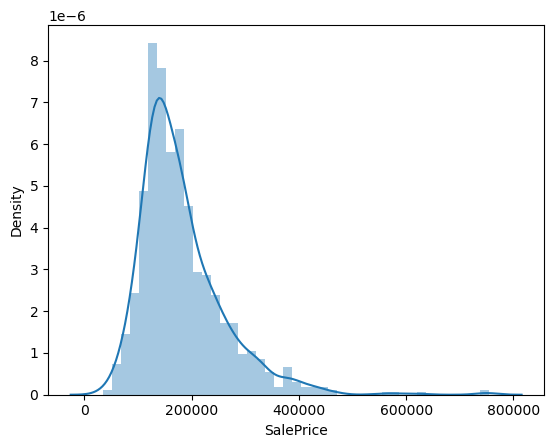

In [710]:
#Distribution of Target Variable
sns.distplot(y_train)
plt.show()

#### The Data is right-skewed. Tus we transform it to make it more gaussian.



In [711]:
#Transforming the Target feature to make the data gaussian
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

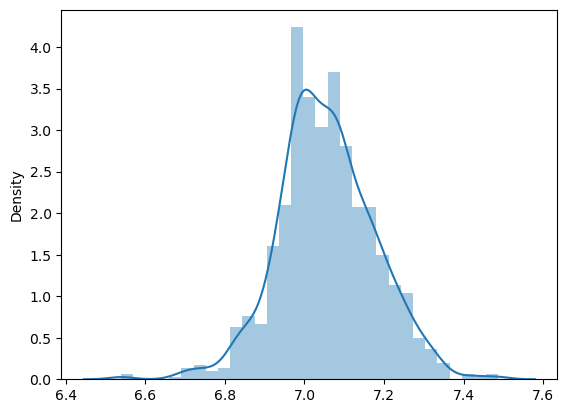

In [712]:
sns.distplot(y_train)
plt.show()

#### The target variable is now transformed.



In [713]:
# Scaling the data using a Minmax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = Xvals.columns
X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns =Xvals.columns

In [714]:
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Regularization using Ridge Regression

In [715]:
# Specify the range of hyperparameters (alpha)
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

# Instantiate Ridge regression
ridge = Ridge()

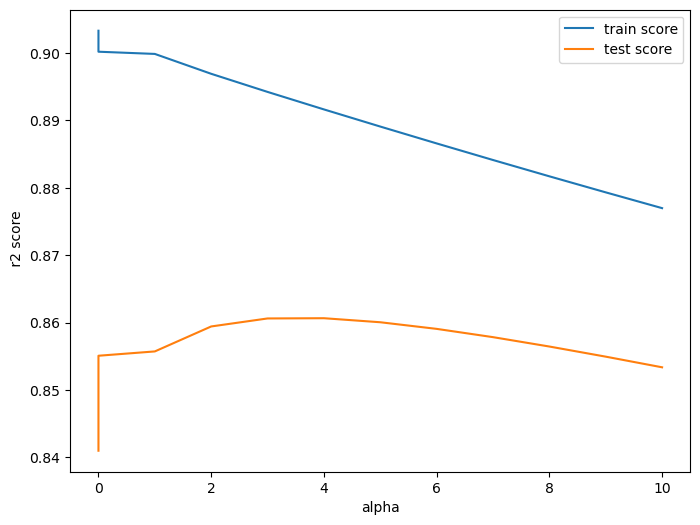

In [716]:
# Plotting mean of Train score
plt.figure(figsize=(8,6))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
# Plotting mean of the Test score
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel(' r2 score')
plt.show()

In [717]:
# creating dataframe with model_ridge results
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.038932,0.052217,0.000917,0.000689,0.000001,{'alpha': 1e-06},0.858863,0.756169,0.818354,0.879397,...,0.841388,0.049654,3,0.901364,0.915496,0.910989,0.895086,0.893653,0.903318,0.008627
1,0.007023,0.005391,0.000402,0.000492,0.00001,{'alpha': 1e-05},0.861921,0.758654,0.820571,0.884393,...,0.844400,0.050074,2,0.901137,0.915279,0.910815,0.894868,0.893396,0.903099,0.008644
2,0.003842,0.006595,0.003151,0.006302,0.0001,{'alpha': 0.0001},0.875563,0.769745,0.837743,0.907057,...,0.858650,0.050892,1,0.895405,0.911497,0.906119,0.889367,0.887762,0.898030,0.009318
3,0.006566,0.007404,0.000600,0.000800,0.001,{'alpha': 0.001},0.853575,0.784070,0.811333,0.876622,...,0.835956,0.033451,4,0.846810,0.865587,0.857557,0.841997,0.838648,0.850120,0.010031
4,0.002321,0.001173,0.001319,0.000861,0.01,{'alpha': 0.01},0.445134,0.424899,0.383235,0.439454,...,0.410921,0.032714,5,0.433985,0.429018,0.405985,0.415734,0.402221,0.417389,0.012438


In [718]:
# Converting the 'param_alpha' datatype from object to int
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')


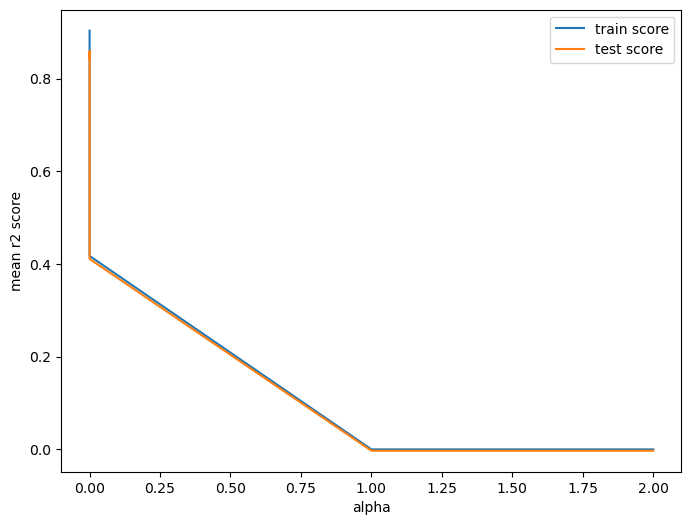

In [719]:
# Plotting mean of Train score
plt.figure(figsize=(8,6))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
# Plotting mean of the Test score
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

In [720]:
# Instantiate Ridge regression with alpha=2
model_ridge = Ridge(alpha=2)
# Fitting the model with the train set
model_ridge.fit(X_train, y_train)

Ridge(alpha=2)

In [721]:
y_train_pred = model_ridge.predict(X_train)
print("RIDGE TRAIN R2 score",metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

RIDGE TRAIN R2 score 0.8937809012072492


In [722]:
y_test_pred = model_ridge.predict(X_test)
print("RIDGE TEST R2 score",metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

RIDGE TEST R2 score 0.8740921714800556


In [723]:

##R2 score - Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_train_pred)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_test_pred)

## mean squared error (MSE) - Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_train_pred)
MSE_ridge_test = mean_squared_error(y_test, y_test_pred)

##Mean Absolute error - train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_train_pred)
MAE_ridge_test = mean_absolute_error(y_test, y_test_pred)

##Root Mean Squared Error - Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)


print(" Ridge Regression Model:\n","*"*40)
print("\n Train data:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train)
print("\n Test data:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\n","*"*40)

 Ridge Regression Model:
 ****************************************

 Train Set:
R2 score: 0.8937809012072492 
MSE score: 0.0015672625931216636 
MAE score: 0.027262795359532667 
RMSE score: 0.03958866748353199

 Test Set:
R2 score: 0.8740921714800556 
MSE score: 0.0019516661104311212 
MAE score: 0.02998296659585482 
RMSE score: 0.04417766528950032 
 ****************************************


### Conclusion
#### We have a good train score 85% and good test score as well 83%. That means what the model learnt in the train set it performed well in the test set.

### Top 10 features of Ridge regression and coefficients

In [724]:
coefficients = np.array(model_ridge.coef_)

coeff_dict = dict(zip(X_train.columns, coefficients[0].round(4)))
# Sort the dictionary by coefficient values in descending order
sorted_coeff_dict = dict(sorted(coeff_dict.items(), key=lambda item: item[1], reverse=True))

# Get the top 10 coefficients and feature names
top_10 = {key: value for key, value in list(sorted_coeff_dict.items())[:10]}

# Print the top 10 coefficients along with feature names
print(top_10)

{'OverallQual': 0.1495, 'GrLivArea': 0.1407, 'OverallCond': 0.1008, 'GarageArea': 0.0838, 'FullBath': 0.0646, 'BsmtFullBath': 0.0477, 'Fireplaces': 0.0462, 'BedroomAbvGr': 0.0444, 'd_BsmtQual': 0.041, 'Neighborhood_StoneBr': 0.0373}


#### {'OverallQual': 0.1495, 'GrLivArea': 0.1407, 'OverallCond': 0.1008, 'GarageArea': 0.0838, 'FullBath': 0.0646, 'BsmtFullBath': 0.0477, 'Fireplaces': 0.0462, 'BedroomAbvGr': 0.0444, 'd_BsmtQual': 0.041, 'Neighborhood_StoneBr': 0.0373}

## Regularization using Lasso Regression

In [725]:
params = {'alpha': [0.000001,0.00001,0.0001,0.001, 0.01, 1.0,2]}

In [726]:
# Instantiate Lasso regression
lasso = Lasso()

In [727]:
# Cross validation with 5 folds
model_lasso= GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
# Fitting the model with train set
model_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 1.0, 2]},
             return_train_score=True, scoring='r2', verbose=1)

In [728]:
# creating dataframe with model_cv results
lasso_results = pd.DataFrame(model_lasso.cv_results_)
lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017289,0.012578,0.002803,0.001681,0.000001,{'alpha': 1e-06},0.858863,0.756169,0.818354,0.879397,...,0.841388,0.049654,3,0.901364,0.915496,0.910989,0.895086,0.893653,0.903318,0.008627
1,0.013732,0.005722,0.001237,0.001013,0.00001,{'alpha': 1e-05},0.861921,0.758654,0.820571,0.884393,...,0.844400,0.050074,2,0.901137,0.915279,0.910815,0.894868,0.893396,0.903099,0.008644
2,0.006031,0.002769,0.002476,0.000840,0.0001,{'alpha': 0.0001},0.875563,0.769745,0.837743,0.907057,...,0.858650,0.050892,1,0.895405,0.911497,0.906119,0.889367,0.887762,0.898030,0.009318
3,0.004036,0.001177,0.002635,0.000948,0.001,{'alpha': 0.001},0.853575,0.784070,0.811333,0.876622,...,0.835956,0.033451,4,0.846810,0.865587,0.857557,0.841997,0.838648,0.850120,0.010031
4,0.006167,0.002817,0.002387,0.000370,0.01,{'alpha': 0.01},0.445134,0.424899,0.383235,0.439454,...,0.410921,0.032714,5,0.433985,0.429018,0.405985,0.415734,0.402221,0.417389,0.012438


In [729]:
# Converting the 'param_alpha' datatype from object to int
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('int32')

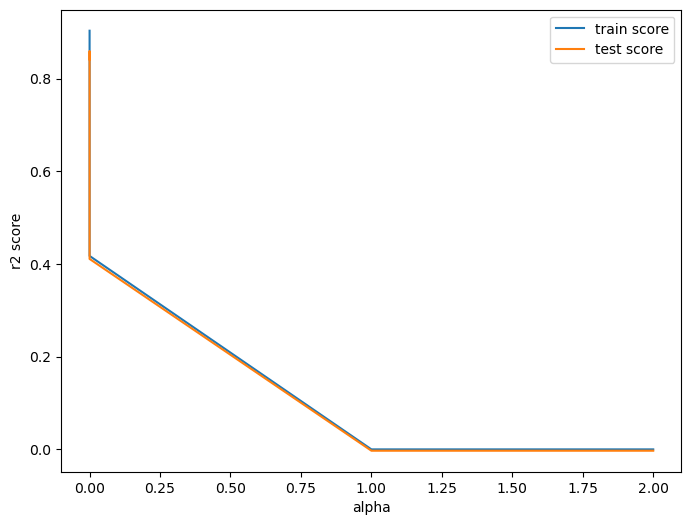

In [730]:
# Plotting mean of Train score
plt.figure(figsize=(8,6))
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
# Plotting mean of the Test score
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])

plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.show()

In [731]:
print(lasso_results['param_alpha'])
print(lasso_results['mean_train_score'])

0    0
1    0
2    0
3    0
4    0
5    1
6    2
Name: param_alpha, dtype: int32
0    0.903318
1    0.903099
2    0.898030
3    0.850120
4    0.417389
5    0.000000
6    0.000000
Name: mean_train_score, dtype: float64


### Analysis basis the graph


the graph says lower the value of lambda (close to 0) , higher the accuracy. here it is coincidentally same

*Train Score*

r2 score goes down when the lambda value increase means the error is increasing. Model is overfitting and generalised.At 0.002 (close to 0) the train set accury is highest(more than 80%).

*Test Score*

At alpha = 0.002 the test accuracy is highest (more than 80%).

After alpha=0.002, the r2 score started decreasing as the alpha is increasing. Select the value of aplha for which the test score peaks up. In our case at alpha=0.002, the error is less in the test set and so accuracy is more close to 80%.

So, the optimum alpha will be 0.002, this level  error and  generalisation of the model for makes a simpler model.

### Lasso regression with optimal alpha 0.002

In [732]:
# Instantiate Lasso regression with alpha=0.002
model_lasso = Lasso(0.002)
# Fitting the model with the train set
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

#### Model performance on the train set

In [733]:
y_train_pred = model_lasso.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.8069457722085366



#### Model performance on the test set

In [734]:

y_test_pred = model_lasso.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.800881671942512


In [735]:
## Lasso Regression Model prediction
y_train_pred = model_lasso.predict(X_train)
y_test_pred = model_lasso.predict(X_test)

##R2 score - Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_train_pred)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_test_pred)

## the mean squared error (MSE) p Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_train_pred)
MSE_lasso_test = mean_squared_error(y_test, y_test_pred)

##Mean Absolute error - train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_train_pred)
MAE_lasso_test = mean_absolute_error(y_test, y_test_pred)

##Root Mean Squared Error - Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("  Lasso Regression Model (alpha=0.002):\n","*"*40)
print("\n   Train data:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\n r Test data :\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

  Lasso Regression Model (alpha=0.002):
 ****************************************

   Train data:
R2 score: 0.8069457722085366 
MSE score: 0.0028485147501759703 
MAE score: 0.03808829066356885 
RMSE score: 0.05337147880821713

 r Test data :
R2 score: 0.800881671942512 
MSE score: 0.0030864839573811545 
MAE score: 0.03999998785808514 
RMSE score: 0.05555613339120312 
 ****************************************


### Conclusion
####  We have train set accuracy 81 % whereas test set accuracy  80%.   Train and test accuracies helps conculde that model is well trained and performed the same on test set

### Lasso Top 10 features and Co-Efficients


In [736]:

lcoefficients = np.array(model_lasso.coef_)

# If lcoefficients is a single value
if lcoefficients.ndim == 0:
    lcoefficients = np.array([lcoefficients])  # Convert to a 1-element array

# Create a dictionary with feature names as keys and coefficients as values
coeff_dict = dict(zip(X_train.columns, lcoefficients.round(4)))

# Sort the dictionary by coefficient values in descending order
sorted_coeff_dict = dict(sorted(coeff_dict.items(), key=lambda item: item[1], reverse=True))

# Get the top 10 coefficients and feature names
top_10 = {key: value for key, value in list(sorted_coeff_dict.items())[:10]}

# Print the top 10 coefficients along with feature names
print(top_10)

{'OverallQual': 0.2628, 'GarageArea': 0.0822, 'GrLivArea': 0.077, 'FullBath': 0.0565, 'Fireplaces': 0.0535, 'd_GarageFinish': 0.0423, 'd_HeatingQC': 0.0313, 'MSZoning_RL': 0.0295, 'd_BsmtFinType1': 0.0292, 'd_BsmtQual': 0.0235}


### {'OverallQual': 0.2628, 'GarageArea': 0.0822, 'GrLivArea': 0.077, 'FullBath': 0.0565, 'Fireplaces': 0.0535, 'd_GarageFinish': 0.0423, 'd_HeatingQC': 0.0313, 'MSZoning_RL': 0.0295, 'd_BsmtFinType1': 0.0292, 'd_BsmtQual': 0.0235}


### Drop five most important predictor variables  and perform lasso regression

In [742]:
#Drop 5  predictor variables from the incoming dataset
X_test_5 = X_test.drop(['OverallQual','GarageArea','GrLivArea','FullBath','Fireplaces'],axis=1)
X_train_5= X_train.drop(['OverallQual','GarageArea','GrLivArea','FullBath','Fireplaces'],axis=1)

# Building Lasso Model with the new dataset
lassoR = Lasso(alpha=0.0001,random_state=100)
lassoR.fit(X_train_5,y_train)
lassoR_coef = lassoR.coef_
y_test_pred = lassoR.predict(X_test_5)
print(' R2 Score -test dataset',r2_score(y_test, y_test_pred))
print(' MSE - test dataset is', mean_squared_error(y_test, y_test_pred))
lassoR_coef = pd.DataFrame(np.atleast_2d(lassoR_coef),columns=X_train_5.columns)
lassoR_coef = lassoR_coef.T
lassoR_coef.rename(columns={0: 'lassoR_coef'},inplace=True)
lassoR_coef.sort_values(by=['lassoR_coef'], ascending=False,inplace=True)
print('The next set of 5  predictor variables are:')
lassoR_coef.head(5)

 R2 Score -test dataset 0.8320680460799884
 MSE - test dataset is 0.0026030716848734364
The next set of 5  predictor variables are:


,lassoR_coef
TotalBsmtSF,0.337070
2ndFlrSF,0.168409
OverallCond,0.136727
LotArea,0.074614
Neighborhood_StoneBr,0.064120
